# Python Script for selecting, aggregating and arranging Census Tables


## Pre-req

In [30]:
import pandas as pd
import functools

In [29]:
persona1_table.iloc[:,0:2]

,POA_CODE_2016,Equal Weighted Score
0,2000,0.000272
1,2006,0.002417
2,2007,0.000833
3,2008,0.000652
4,2009,0.000671
...,...,...
2665,2899,0.004057
2666,6798,0.002160
2667,6799,0.012154
2668,9494,0.000044


## Step 1: Importing the Data

* Look at the meta-data table to see which columns are of interest
* Create a list **names**,which will have our interested tables expressed as a CSV name provided by the census
* Create a dictionary **d** which will have a key corresponding to a name, and a value corresponding to the read csv file itself


In [31]:
dataTabs = ["01","02","04A","04B","10A",
            "10B","10C","13A","13B","15",
            "17A","17B","17C","18","25",
            "28","30","31","57A","57B","59"]

names = []
d = {}
for i in range(len(dataTabs)):
    name = "2016 Census GCP Postal Areas for AUST/2016Census_"+"G"+dataTabs[i]+"_AUS_POA.csv"
    names.append(name)
    d["dataG" + str(dataTabs[i])] = pd.read_csv(names[i])

# list(d.values())[0:3]

## Step 2(a): Cleaning and Checking data

* Lambda function is used, which allows us to merge all the tables specified in a list
* Check for **missing** values before any analysis
* Check for any **absurd** values ( such as total populations which are zero )
* Result is a 2658 x 2687 array 

In [32]:
# https://stackoverflow.com/questions/44327999/python-pandas-merge-multiple-dataframes

df_merged = functools.reduce(lambda  left,right: pd.merge(left,right,on=['POA_CODE_2016'],
                                            how='inner'), list(d.values()))

print(df_merged.isnull().values.any())
df_merged = df_merged[df_merged["Tot_P_P"] != 0]
# df_merged


False


## Step 2(b): Removing Excess Data Columns ( Attribute Specific) 
 
 
### Persona 1: Young people, aged 15-24

* G01: these include the 15-24 in education + non-education  
Age_15_19_yr_P  
Age_20_24_yr_P  


### Persona 2: Indigenous Australians ( identified as travel disadvantaged)

* G01  
Indigenous_P_Tot_P 


### Persona 4: Disabled People ( need assistance with core activites )

* G18:  
P_15_19_Need_for_assistance  
P_20_24_Need_for_assistance  
P_25_34_Need_for_assistance  
P_35_44_Need_for_assistance  
P_45_54_Need_for_assistance  
P_55_64_Need_for_assistance  
P_65_74_Need_for_assistance  
P_75_84_Need_for_assistance  
P_85_over_Need_for_assistance  
  

### Persona 5: Seniors (55+)
* G01:
Age_55_64_yr_P  
Age_65_74_yr_P  
Age_75_84_yr_P  
Age_85ov_P


### Other Qualities of Interest

*People who go to work using **only** a taxi*  
G59: "One_method_Taxi_P"  

*Households with more than 3 people & households with 1 or less motor vehicles*  
G30:  
Num_MVs_per_dweling_0_MVs  
Num_MVs_per_dweling_1_MVs  
  
G31:  
Num_Psns_UR_3_Total  
Num_Psns_UR_4_Total  
Num_Psns_UR_5_Total  
Num_Psns_UR_6mo_Total  

*Households which are a single-parent family with a dependant aged under 15*  
G25:     
OPF_ChU15_a_Total_F (One_parent_family_with_children_under_15_and_Total_Families)  

In [33]:
#Large CSV of all the Personas
personad={}

#General Stuff
personad["1"]="POA_CODE_2016"

#Population Density
personad["2"]="Tot_P_P"

#People aged 15-24
personad["3"]="Age_15_19_yr_P"
personad["4"]="Age_20_24_yr_P"

#People who immigrated from 2011 to 2016
personad["5"]="Tot_2011"
personad["6"]="Tot_2012"
personad["7"]="Tot_2013"
personad["8"]="Tot_2014"
personad["9"]="Tot_2015"
personad["10"]="Tot_2016"

#People over the age of 55 
personad["11"]="Age_55_64_yr_P"
personad["12"]="Age_65_74_yr_P"
personad["13"]="Age_75_84_yr_P"
personad["14"]="Age_85ov_P"

#People over the age of 14 who need assitance with core activites/disabled
personad["15"]="P_15_19_Need_for_assistance"
personad["16"]="P_20_24_Need_for_assistance"
personad["17"]="P_25_34_Need_for_assistance"
personad["18"]="P_35_44_Need_for_assistance"
personad["19"]="P_45_54_Need_for_assistance"
personad["20"]="P_55_64_Need_for_assistance"
personad["21"]="P_65_74_Need_for_assistance"
personad["22"]="P_75_84_Need_for_assistance"
personad["23"]="P_85_over_Need_for_assistance"


#Number of single parent families with children under 15
personad["24"]="OPF_ChU15_a_Total_F"

#Households with less than one motor vehicle
personad["25"]="Num_MVs_per_dweling_0_MVs"
personad["26"]="Num_MVs_per_dweling_1_MVs"

#Households with more than 3 people ( can change this)
personad["27"]="Num_Psns_UR_3_Total"
personad["28"]="Num_Psns_UR_4_Total"
personad["29"]="Num_Psns_UR_5_Total"
personad["30"]="Num_Psns_UR_6mo_Total"

#Indigenous Australians
personad["31"]="Indigenous_P_Tot_P"

#Sole method to work is taxi
personad["32"]="One_method_Taxi_P"

#Median Income (under the median)
personad["33"] = "Neg_Nil_inc_Tot" #Negative_Nil_income_Total
personad["34"] = "FI_1_149_Tot" # 1 - 149
personad["35"] = "FI_150_299_Tot" # 150 - 299
personad["36"] = "FI_300_399_Tot" # 300 - 399
personad["37"] = "FI_400_499_Tot"
personad["38"] = "FI_500_649_Tot"
personad["39"] = "FI_650_799_Tot"
personad["40"] = "FI_800_999_Tot"



## Step 3: Data Manipulation  

* Aggregate the columns of interest to form market composition of the persona
* Drop the columns after aggregation has bene completed
* Rename relevant columns for ease

In [34]:
#Personas

#Subsetting the relevant rows
persona1_table = df_merged.loc[:,personad.values()]

#Merging and dropping number of 15-24 y.o.
persona1_table["Number of 15-24 Year Olds"] = persona1_table.loc[:,"Age_15_19_yr_P":"Age_20_24_yr_P"].sum(axis=1) ## keep
persona1_table.drop(columns=persona1_table.loc[:,"Age_15_19_yr_P":"Age_20_24_yr_P"],inplace = True)

#Merging and dropping number of immigrants since 2011
persona1_table["Number Of Immigrants arrived since 2011"]=persona1_table.loc[:,"Tot_2011":"Tot_2016"].sum(axis=1)
persona1_table.drop(columns=persona1_table.loc[:,"Tot_2011":"Tot_2016"],inplace = True)

#Merging and dropping households people over the age of 55
persona1_table["Number of people aged 55+"]=persona1_table.loc[:,"Age_55_64_yr_P":"Age_85ov_P"].sum(axis=1)
persona1_table.drop(columns=persona1_table.loc[:,"Age_55_64_yr_P":"Age_85ov_P"],inplace = True)

#Merging and dropping 14 and older who need assistance with core activites (disabled)
persona1_table["Number of people aged 14 and old with a disability"]=persona1_table.loc[:,"P_15_19_Need_for_assistance":"P_85_over_Need_for_assistance"].sum(axis=1)
persona1_table.drop(columns=persona1_table.loc[:,"P_15_19_Need_for_assistance":"P_85_over_Need_for_assistance"],inplace = True)

#Merging and dropping Households with 1 or less cars
persona1_table["Number of households with 1 or less cars"]=persona1_table.loc[:,"Num_MVs_per_dweling_0_MVs":"Num_MVs_per_dweling_1_MVs"].sum(axis=1)
persona1_table.drop(columns=persona1_table.loc[:,"Num_MVs_per_dweling_0_MVs":"Num_MVs_per_dweling_1_MVs"],inplace = True)

#Merging and dropping households with 3 or more people
persona1_table["Number of Households with more than 3 people"]=persona1_table.loc[:,"Num_Psns_UR_3_Total":"Num_Psns_UR_6mo_Total"].sum(axis=1)
persona1_table.drop(columns=persona1_table.loc[:,"Num_Psns_UR_3_Total":"Num_Psns_UR_6mo_Total"],inplace = True)

#Merging and dropping Individuals under the median Income
persona1_table["Number of people under Median income"]=persona1_table.loc[:,"Neg_Nil_inc_Tot":"FI_800_999_Tot"].sum(axis=1)
persona1_table.drop(columns=persona1_table.loc[:,"Neg_Nil_inc_Tot":"FI_800_999_Tot"],inplace = True)

persona1_table.rename(columns={'OPF_ChU15_a_Total_F': 'Single Parent Families with Children under 15'
                               , 'Tot_P_P': 'Total Population'
                               , 'Indigenous_P_Tot_P':'Total Indigenous Population'
                               , 'One_method_Taxi_P':"Number of people who travel to work ONLY by Taxi"
                               }, inplace=True)

persona1_table



,POA_CODE_2016,Total Population,Single Parent Families with Children under 15,Total Indigenous Population,Number of people who travel to work ONLY by Taxi,Number of 15-24 Year Olds,Number Of Immigrants arrived since 2011,Number of people aged 55+,Number of people aged 14 and old with a disability,Number of households with 1 or less cars,Number of Households with more than 3 people,Number of people under Median income
0,POA2000,27411,138,52,106,5826,10018,3369,320,7874,3260,1015
1,POA2006,1259,0,17,3,1136,127,21,3,4,0,0
2,POA2007,8845,49,57,30,3434,3787,707,95,2512,999,280
3,POA2008,11712,49,74,35,4582,4724,830,116,3971,1109,378
4,POA2009,12813,150,122,94,1437,2702,2367,196,4293,1547,386
...,...,...,...,...,...,...,...,...,...,...,...,...
2665,POA2899,1748,35,9,0,107,83,723,63,254,198,138
2666,POA6798,1843,16,9,3,176,80,439,34,167,175,28
2667,POA6799,544,5,6,0,45,3,170,19,47,83,42
2668,POA9494,45182,0,3543,40,6254,4388,13023,1953,0,0,0


### Additional Data Manipulation

* Remove the "POA" which is infront of postcodes
* Convert our data in proportions of total population rather than raw data
* Convert each observation into a score which lies between 0 to 1, with 0 occuring least and 1 occurring most often using the below normalization formula

https://stats.stackexchange.com/questions/70801/how-to-normalize-data-to-0-1-range

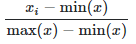


In [35]:
#Removing POA for ease of use
persona1_table['POA_CODE_2016'] = persona1_table['POA_CODE_2016'].str.strip('POA')

#Calculating proportion of the population
persona1_table.iloc[:,2:]=persona1_table.iloc[:,1:].div(persona1_table["Total Population"],axis=0)

#Assign a score from 0 to 1 based on each attribute
for i in persona1_table.columns[1:]:
    persona1_table[i]=(persona1_table[i]-persona1_table[i].min())/(persona1_table[i].max()-persona1_table[i].min())

# persona1_table

### Combining the Attribute scores to create our Personas

Combining scores of each attribute to create our "Personas". This will allow us to compare postcodes in order to identify where a large propotion of **each** of our persona's reside

In [36]:
# Creating persona 1 score 15-24 year old
## Under the Median Income
## Potentially in a house hold with less than 1 car but have a couple siblings

persona1_table["Youth Score"]=persona1_table.loc[:,["Number of 15-24 Year Olds",
                                                    "Number of households with 1 or less cars",
                                                    "Number of Households with more than 3 people",
                                                    "Number of people under Median income"]].sum(axis=1)

#Creating persona 2 score Senior Citizen
# Aged 55 +
# Still working, but may favour going to work in a taxi (traditional way of thinking)

persona1_table["Senior's Score"]=persona1_table.loc[:,["Number of people aged 55+",
                                                       "Number of people who travel to work ONLY by Taxi"]].sum(axis=1)

#Creating Persona 3 Indigenous Australians
# Low population density
# Under median income
# No Car Ownership or limited car ownership

persona1_table["Indigenous Score"]=persona1_table.loc[:,["Total Indigenous Population",
                                                         "Number of households with 1 or less cars",
                                                         "Number of people under Median income",
                                                         "Total Population"]].sum(axis=1)

#Creating Persona 4: Disabled Person
# 14+ in age and disabled
# Under median income

persona1_table["Disabled Score"]=persona1_table.loc[:,["Number of people aged 14 and old with a disability",
                                                       "Number of people under Median income"]].sum(axis=1)


### Combining the Persona Scores to form the equal weighted one

Combining the score for **each** persona into one equal weighted averaged score. This score will tell us which postcodes of Australia have the highest proportion of these **four** personas.

A **higher** score signifes a **higher propotion**, where a **lower** score signifes a **smaller** proportion

In [37]:
persona1_table['Equal Weighted Score'] = persona1_table.loc[:,"Youth Score":"Disabled Score"].mean(axis = 1)
#persona1_table


### Preparing the data for JS leaflet

* Reordering the columns for easier manipulation in leaflet
* Changing postcodes to a "string object" so that leading zeroes will not be removed when we export the CSV

In [38]:
#Reordering the columns 
cols = persona1_table.columns.tolist()
cols = [cols[0]] + [cols[-1]] + cols[-2:0:-1] 
persona1_table=persona1_table[cols]

#Changing Postcodes to "string" object, such that the leading zeroes will not be removed in the CSV
persona1_table["POA_CODE_2016"] = persona1_table["POA_CODE_2016"].astype("str")

# persona1_table


## Step 4: Export, Visualise and Communicate

In [40]:
persona1_table.to_csv('persona_tables.csv', index = False)

